In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

In [36]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [37]:
!pip install xgboost
import xgboost as xgb

In [35]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Feature Variables=>	fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxid,total sulfur dioxide,density,pH,sulphates,alcohol
target variable=>quality

All data is numerical data. 

In [6]:
df.shape


(1599, 12)

There are 1599 rows and 12 columns

In [8]:
#stastical information
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#datatype information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All columns except 'quality' are of float datatype and 'quality' is of int datatype

# preprocessing

In [10]:
#lets check if there any null value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in the data set


# Exploratory Data Analysis

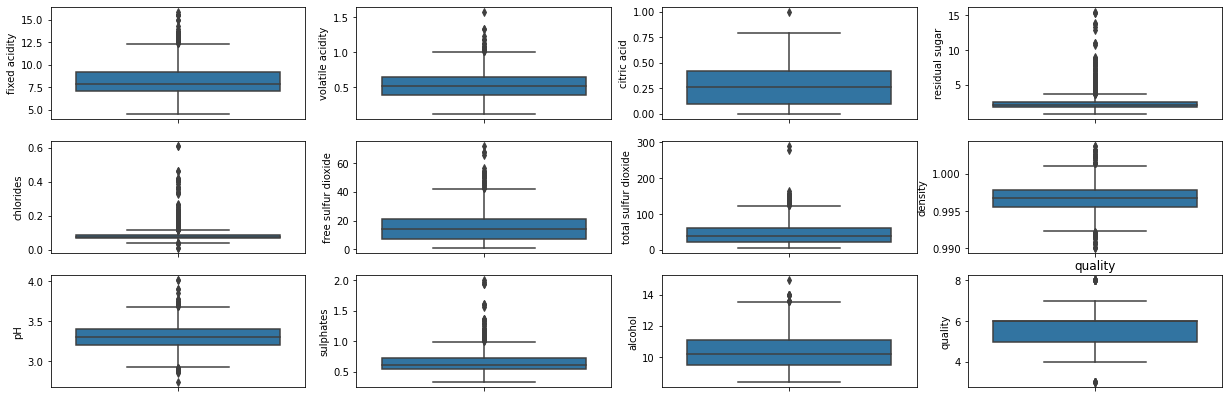

In [23]:
#lets check for outliers by creating boxplots
fig,ax=plt.subplots(ncols=4,nrows=3,figsize=(21,7))
index=0
ax=ax.flatten()
for col,value in df.items():
    if col !='type':
        sns.boxplot(y=col,data=df,ax=ax[index])
        index=index+1
        plt.title(col)
        #plt.show()

There are some outliers...which we need to take into consideration

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

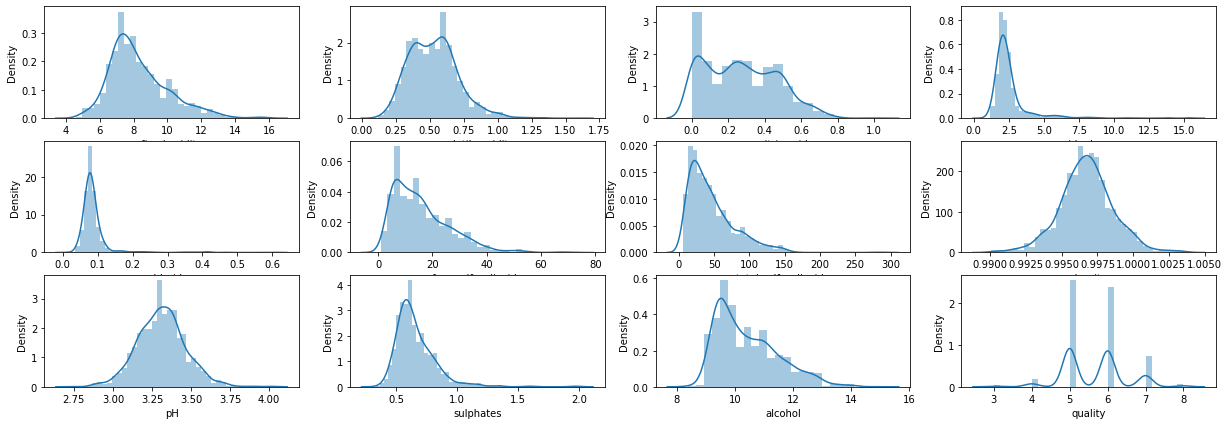

In [26]:
#lets create distribution plot
#lets check for outliers by creating boxplots
fig,ax=plt.subplots(ncols=4,nrows=3,figsize=(21,7))
index=0
ax=ax.flatten()
for col,value in df.items():
    if col !='type':
        sns.distplot(value,ax=ax[index])
        index=index+1
        

almost no skewed data. We can ignore. No need to change this distribution plot. Only 'free sulphur dioxide' is little bit skewed. Lets apply log transformation for this one column. 

In [ ]:
#log Transformation
df['free sulfur dioxide']=np.log(1+ df['free sulfur dioxide'])


In [28]:
df['total sulfur dioxide']=np.log(1+df['total sulfur dioxide'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

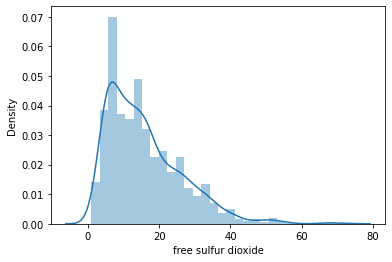

In [31]:
#lets check the distplot
sns.distplot(df['free sulfur dioxide'])


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

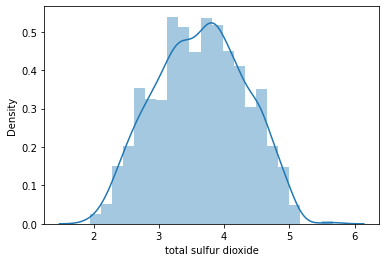

In [30]:
sns.distplot(df['total sulfur dioxide'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

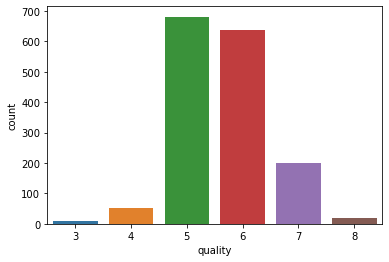

In [4]:
sns.countplot(df['quality'])

There are 6 classes. But class 3,4 and 8 have very few data in it. Class 5,6 and 7 have the maximumm data. So, the whole model will be biased to these 3 classes. This classification is imbalanced, so we need to generalise it.

<AxesSubplot:>

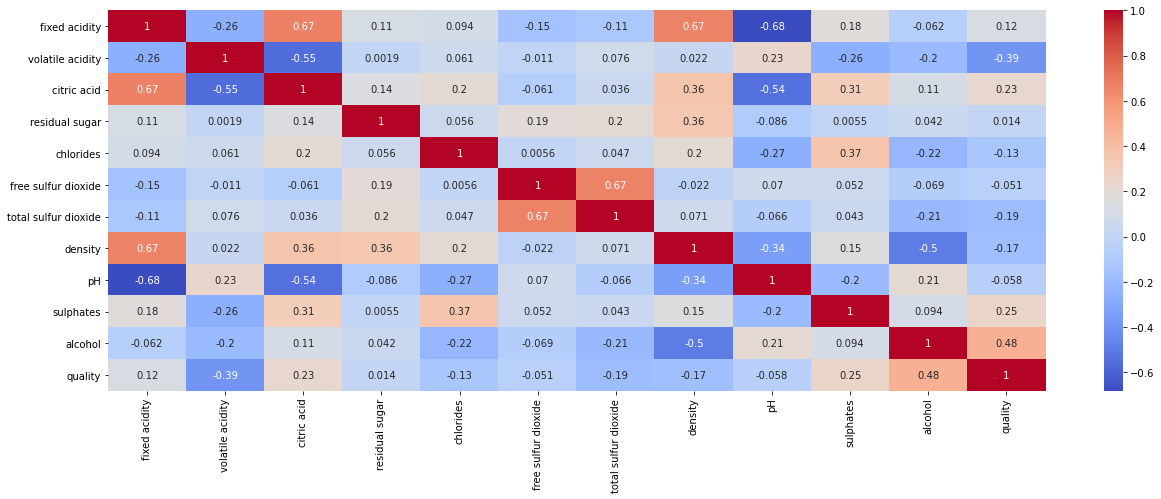

In [6]:
corr=df.corr()
plt.figure(figsize=(21,7))
sns.heatmap(corr,annot=True,cmap='coolwarm')

we can see that alcohol has a strong positive relationship with 'quality'...our target variable. Its value is 0.48 and it has negative relationship with density.

'Total sulphur dioxide' and 'free sulphur diaoxide' also stronly related (positive). Value is 0.67

# Lets split the data into features and target variable


In [12]:
x=df.drop(columns=['quality'])
y=df['quality']

In [16]:
#class balancing
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

lets oversample all the minority classes so that our data will be balanced

In [22]:
oversample=SMOTE()
#transform the dataset
x,y=oversample.fit_resample(x,y)

In [23]:
#lets check whether data has got balanced or not
y.value_counts()


4    681
6    681
8    681
3    681
5    681
7    681
Name: quality, dtype: int64

Great!!!! now our data has got balanced.

# Model training

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [27]:
LR=LogisticRegression() # This is used to classify
LR.fit(x_train,y_train)
acc=LR.score(x_test,y_test)
#cross_validation
score=cross_val_score(LR,x,y,cv=3)
cv_score=np.mean(score)

print("Accuracy= ",acc)
print("CV score=",cv_score)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Accuracy=  0.46477495107632094
CV score= 0.4823788546255507


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Using logistic regression as classification model, we are getting 46.48% accuracy and Cv score is 48.24%. 
This is not so good classification model for our dataset

In [29]:
#lets try for Decison tree classifier

DT=DecisionTreeClassifier() # This is used to classify
DT.fit(x_train,y_train)
acc=DT.score(x_test,y_test)
#cross_validation
score=cross_val_score(DT,x,y,cv=3)
cv_score=np.mean(score)

print("Accuracy= ",acc)
print("CV score=",cv_score)

Accuracy=  0.7504892367906066
CV score= 0.7139011257953989


Using Decision Tree as classification model, we are getting 75.05% accuracy and Cv score is 71.39%. This is better classification model for our dataset

In [31]:
#lets use RandomForestClassifier
RF=RandomForestClassifier() # This is used to classify
RF.fit(x_train,y_train)
acc=RF.score(x_test,y_test)
#cross_validation
score=cross_val_score(RF,x,y,cv=3)
cv_score=np.mean(score)

print("Accuracy= ",acc)
print("CV score=",cv_score)

Accuracy=  0.8444227005870841
CV score= 0.7968673519334312


Using random forest classifier, we are getting 84.44% accuracy and cv score is 79.69%. This is working very well.

In [40]:
xgb1=xgb.XGBClassifier() # This is used to classify
xgb1.fit(x_train,y_train)
acc=xgb1.score(x_test,y_test)
#cross_validation
score=cross_val_score(xgb1,x,y,cv=3)
cv_score=np.mean(score)

print("Accuracy= ",acc)
print("CV score=",cv_score)

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy=  0.8395303326810176
CV score= 0.7829172785119921


XGBoost classifer is giving 83.95% accuracy and 78.29% cv score.

# Conclusion

For our dataset, after doing oversampling, Randomforestclassifier is working very well as compared to logistic regression, decision tree classifier and xgboost classifier.